The core of this project is based around a simple task -- performing genre analysis on the “Multi-
Lingual Lyrics for Genre Classification” dataset on kaggle.
https://www.kaggle.com/datasets/mateibejan/multilingual-lyrics-for-genre-classification
This is an extensive dataset that is split into training and testing subsets. The testing dataset
should be used for final testing only. The training dataset should be all training and validation
tasks as appropriate.
This first part of the task is to perform a number of analyses based on training from scratch to
predict genre based on initially on song lyrics and then on song lyrics and artist.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johan.pieterse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/johan.pieterse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/johan.pieterse/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/johan.pieterse/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
# Define the paths to the train and test CSV files
train_file_path = 'train.csv'
test_file_path = 'test.csv'

# Load the train and test datasets
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Lowercase all column names in the training dataset
train_df.columns = [col.lower() for col in train_df.columns]

# Lowercase all column names in the testing dataset
test_df.columns = [col.lower() for col in test_df.columns]

# Display the first few rows of the train and test datasets
print("Train DataFrame Preview:")
print(train_df.head())

print("\nTest DataFrame Preview:")
print(test_df.head())

# Remove rows with NaN values in the 'lyrics' column in the training dataset
train_df = train_df.dropna(subset=['lyrics'])

# Remove rows with NaN values in the 'lyrics' column in the testing dataset
test_df = test_df.dropna(subset=['lyrics'])

# Convert all lyrics to lowercase in the training dataset
train_df['lyrics'] = train_df['lyrics'].str.lower()

# Convert all lyrics to lowercase in the testing dataset
test_df['lyrics'] = test_df['lyrics'].str.lower()

# Display the first few rows of the cleaned DataFrames
print("Cleaned Train DataFrame Preview:")
print(train_df.head())

print("\nCleaned Test DataFrame Preview:")
print(test_df.head())

Train DataFrame Preview:
      artist                     song genre language  \
0  12 stones            world so cold  Rock       en   
1  12 stones                   broken  Rock       en   
2  12 stones             3 leaf loser  Rock       en   
3  12 stones  anthem for the underdog  Rock       en   
4  12 stones               adrenaline  Rock       en   

                                              lyrics  
0  It starts with pain, followed by hate\nFueled ...  
1  Freedom!\nAlone again again alone\nPatiently w...  
2  Biting the hand that feeds you, lying to the v...  
3  You say you know just who I am\nBut you can't ...  
4  My heart is beating faster can't control these...  

Test DataFrame Preview:
                   song  song year                   artist    genre  \
0         craftsmanship       2005                  buck-65  Hip-Hop   
1           come-on-out       2012               the-elwins    Indie   
2                  riot       2013  bullet-for-my-valentine    Meta

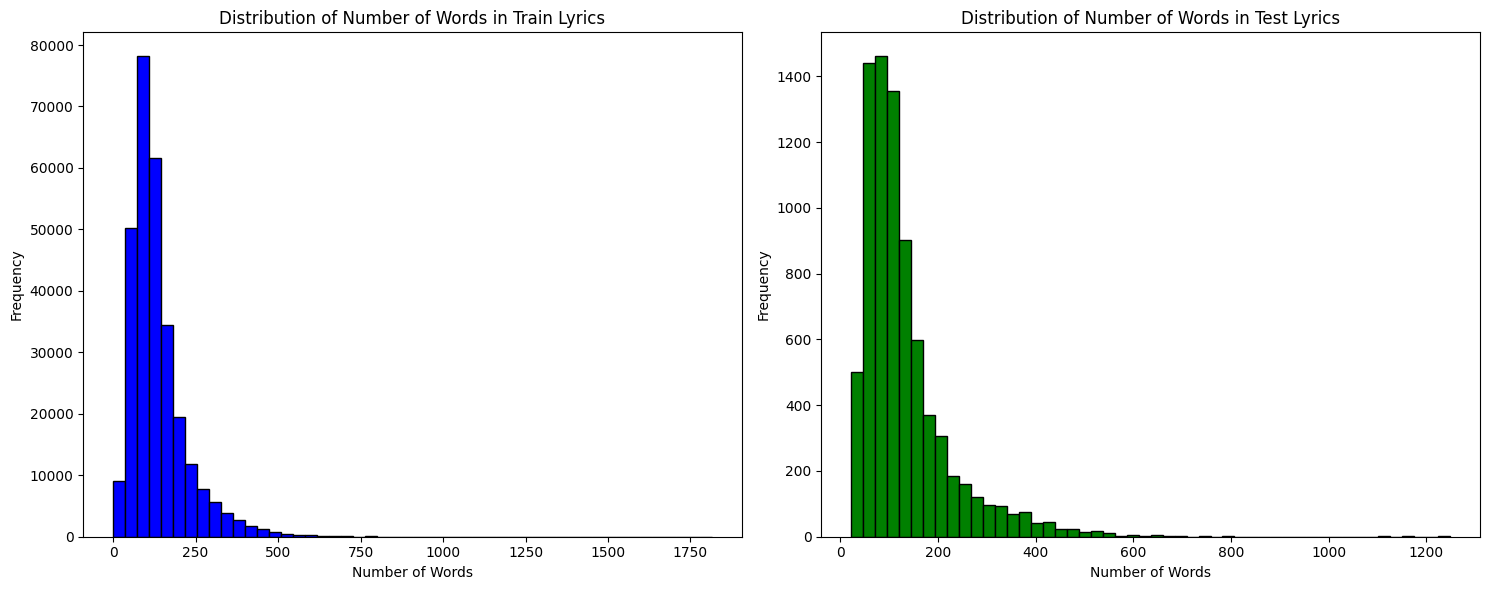

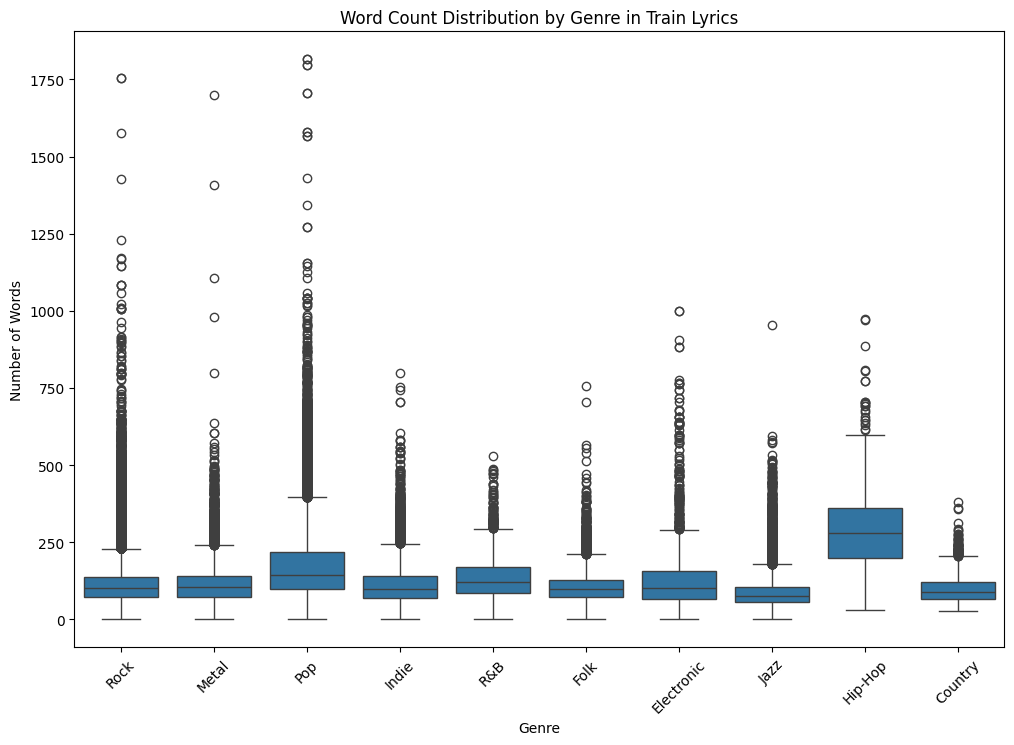

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_df and test_df are your DataFrames and they have a column 'lyrics'

# Calculate the number of words in each lyric for train_df
train_df['num_words'] = train_df['lyrics'].apply(lambda x: len(str(x).split()))

# Calculate the number of words in each lyric for test_df
test_df['num_words'] = test_df['lyrics'].apply(lambda x: len(str(x).split()))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the distribution of the number of words in train_df
axes[0].hist(train_df['num_words'], bins=50, color='blue', edgecolor='black')
axes[0].set_title('Distribution of Number of Words in Train Lyrics')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')

# Plot the distribution of the number of words in test_df
axes[1].hist(test_df['num_words'], bins=50, color='green', edgecolor='black')
axes[1].set_title('Distribution of Number of Words in Test Lyrics')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

# Create a box plot for word count grouped by genre
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_df, x='genre', y='num_words')
plt.title('Word Count Distribution by Genre in Train Lyrics')
plt.xlabel('Genre')
plt.ylabel('Number of Words')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [4]:
# Assuming train_df and test_df are your DataFrames and they have a column 'lyrics'

# Calculate the number of words in each lyric for train_df
train_df['num_words'] = train_df['lyrics'].apply(lambda x: len(str(x).split()))

# Calculate the number of words in each lyric for test_df
test_df['num_words'] = test_df['lyrics'].apply(lambda x: len(str(x).split()))

# Find the number of rows with word count less than 100 in train_df
train_less_than_100 = train_df[train_df['num_words'] < 100].shape[0]
train_total_rows = train_df.shape[0]
print(f"Number of rows with word count less than 100 in train_df: {train_less_than_100}")
print(f"Total number of rows in train_df: {train_total_rows}")
print(f"Percentage of rows with word count less than 100 in train_df: {train_less_than_100 / train_total_rows * 100:.2f}%")

# Find the number of rows with word count less than 100 in test_df
test_less_than_100 = test_df[test_df['num_words'] < 100].shape[0]
test_total_rows = test_df.shape[0]
print(f"Number of rows with word count less than 100 in test_df: {test_less_than_100}")
print(f"Total number of rows in test_df: {test_total_rows}")
print(f"Percentage of rows with word count less than 100 in test_df: {test_less_than_100 / test_total_rows * 100:.2f}%")

Number of rows with word count less than 100 in train_df: 28195
Total number of rows in train_df: 290148
Percentage of rows with word count less than 100 in train_df: 9.72%
Number of rows with word count less than 100 in test_df: 717
Total number of rows in test_df: 7935
Percentage of rows with word count less than 100 in test_df: 9.04%


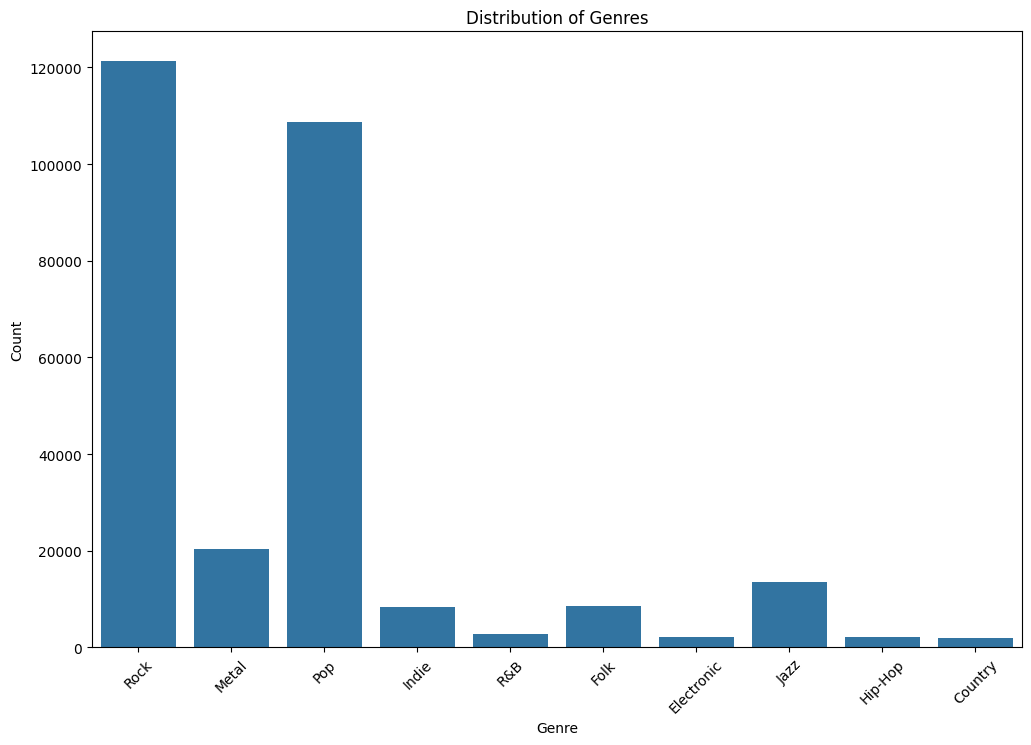

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x='genre')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [5]:
def preprocess_text_old(text):
    text = text.lower()
    text = text.replace('\n', ' ')
    return text

In [6]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocess the text data
def preprocess_text(text, use_stemming=False):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Perform stemming or lemmatization
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Reassemble the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

train_df['lyrics'] = train_df['lyrics'].apply(preprocess_text)
test_df['lyrics'] = test_df['lyrics'].apply(preprocess_text)

In [7]:
import os

output_dir = 'part_1_data'
# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the train and test datasets to CSV files
train_df.to_csv('part_1_data/train_encoded_lemmatize.csv', index=False)
test_df.to_csv('part_1_data/test_encoded_lemmatize.csv', index=False)